## Classifying our variables

Our current variables can be classified as either categorical or numerical data, as shown:

| Categorical            | Numerical                | Mixed                        |
|------------------------|--------------------------|------------------------------|
| `domain_in_ip`         | `length_url`             | `time_domain_activation`     |
| `url_shortened`        | `qty_at_url`             | `time_domain_expiration`     |
| `tls_ssl_certificate`  | `qty_dot_domain`         |                              |
| `url_google_index`     | `qty_hyphen_domain`      |                              |
| `domain_google_index`  |                          |                              |
| `phishing`             |                          |                              |

<br>

The reason `time_domain_activation` and `time_domain_expiration` are mixed is due to a two-part process:
1. Determine if a domain exists (categorical). 
2. If it does, we then analyse the numerical values to assess for potential phishing activity.

---

## Analysing Categorical Data

For analysing the catgorical variables against the `phishing` variable (which is also a categorical variable), we use basic Contingency Table (also known as Cross Tabulation). This table displays how often different combinations of your categorical variables occur.

We will also utilise the following statistics in conjunction with our Contingency Table:

- **Chi-Square Statistic (χ²)**: This statistic measures how much our observed data differs from what we would expect if there were truly no relationship between the variables.
- **P-value**: The p-value helps us determine the significance of our results. It represents the probability of observing results as extreme, or more extreme, than our current data if there were truly no relationship between the variables.

In [16]:
# Open the datasets and import libraries
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sb
import matplotlib.pyplot as plt

url_information = pd.read_csv('../datasets/sampled_url_information.csv')

In [17]:
# Create the contingency tables
ip_vs_phishing = pd.crosstab(url_information['domain_in_ip'], url_information['phishing'])
shortened_vs_phishing = pd.crosstab(url_information['url_shortened'], url_information['phishing'])
certificate_vs_phishing = pd.crosstab(url_information['tls_ssl_certificate'], url_information['phishing'])
urlgoogle_vs_phishing = pd.crosstab(url_information['url_google_index'], url_information['phishing'])
domaingoogle_vs_phishing = pd.crosstab(url_information['domain_google_index'], url_information['phishing'])

In [32]:

def displayContingencyTable(contingency_table):
    # Performing Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square Statistic: {chi2}, p-value: {p}")

    # Interpretation of the result
    if p < 0.05:
        print("There is a significant association between the two variables.")
    else:
        print("There is no significant association between the two variables.")

    # Plotting the heatmap
    x_label = contingency_table.index.name
    y_label = 'phishing'
    title = f'Heatmap of {x_label} vs. {y_label}'

    plt.figure(figsize=(6, 4)) 
    sb.heatmap(contingency_table, annot=True, fmt='g')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Chi-square Statistic: 20.401182410872465, p-value: 6.279098696288341e-06
There is a significant association between the two variables.


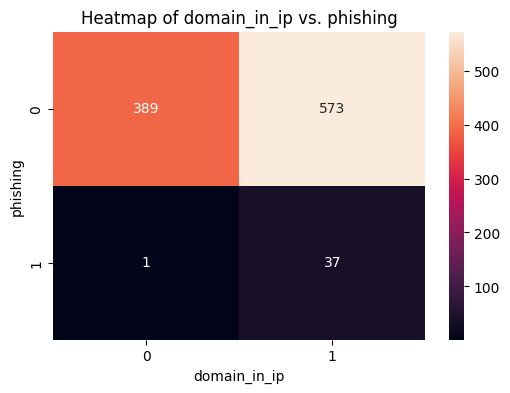

Chi-square Statistic: 13.487153215636827, p-value: 0.00024020234060995253
There is a significant association between the two variables.


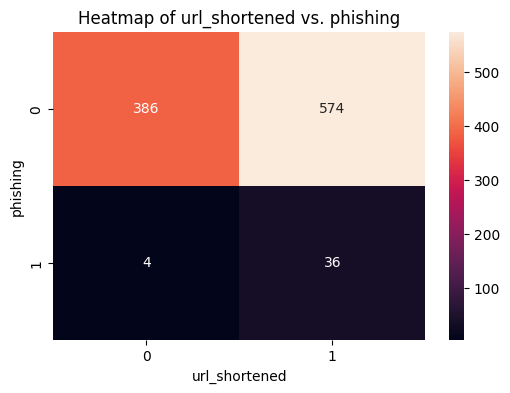

Chi-square Statistic: 4.927724573246753, p-value: 0.026429096063403993
There is a significant association between the two variables.


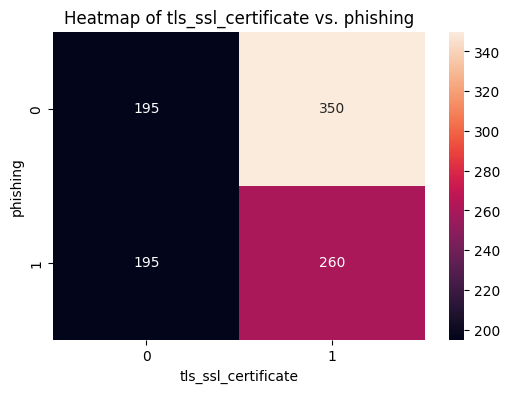

Chi-square Statistic: 69.5370203566925, p-value: 7.947451486666208e-16
There is a significant association between the two variables.


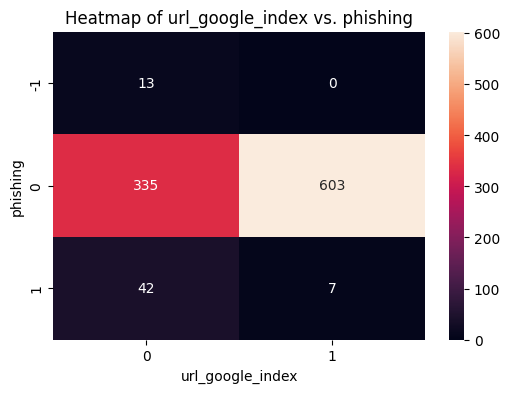

Chi-square Statistic: 46.04948471539767, p-value: 1.0011091869349528e-10
There is a significant association between the two variables.


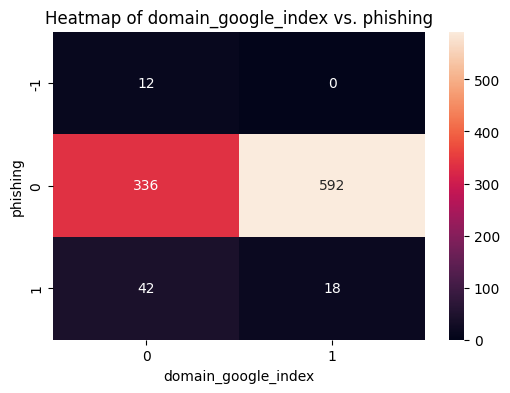

In [34]:
contingency_tables = [
    ip_vs_phishing,
    shortened_vs_phishing,
    certificate_vs_phishing,
    urlgoogle_vs_phishing,
    domaingoogle_vs_phishing
]

for table in contingency_tables:
    displayContingencyTable(table)